In [18]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [19]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [20]:
torch.manual_seed(1)

In [21]:
def model_train(model, x, y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        if epoch % 500 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')

        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction

# Function 1

In [22]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


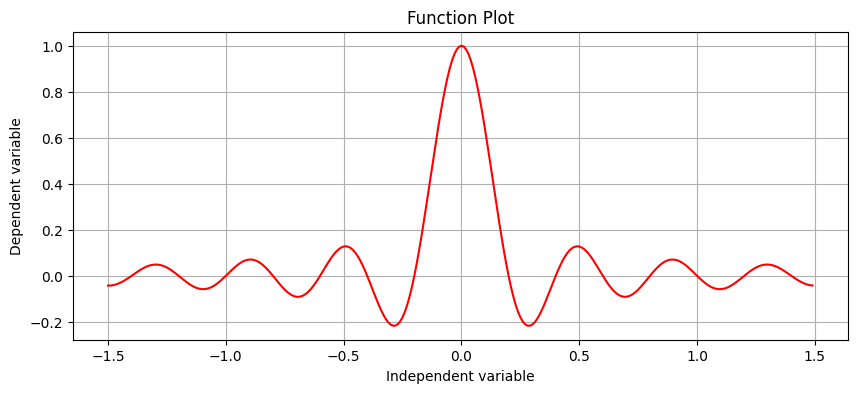

In [23]:
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Convert tensors to numpy arrays for plotting
x_np = x_tensor.numpy()
y_np = y_tensor.numpy()

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(x_np, y_np, color="red")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.grid(True)
plt.show()

## Model 1

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        # Initialize linear layers
        self.layers = nn.ModuleList([
            nn.Linear(1, 5),
            nn.Linear(5, 10),
            * [nn.Linear(10, 10) for _ in range(4)],  # Creates four 10 -> 10 layers
            nn.Linear(10, 5),
            nn.Linear(5, 1)
        ])

    def forward(self, x):
        # Apply Leaky ReLU to all but the last layer
        for layer in self.layers[:-1]:
            x = F.leaky_relu(layer(x))
        # No activation after the last layer
        x = self.layers[-1](x)
        return x

model_1 = Model1()


In [25]:
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_1, x_tensor, y_tensor)

571
epoch: 500, loss = 0.0050
epoch: 1000, loss = 0.0028
epoch: 1500, loss = 0.0024
epoch: 2000, loss = 0.0025
epoch: 2500, loss = 0.0024
epoch: 3000, loss = 0.0023
epoch: 3500, loss = 0.0023
epoch: 4000, loss = 0.0024
epoch: 4500, loss = 0.0024
epoch: 5000, loss = 0.0022
epoch: 5500, loss = 0.0024
epoch: 6000, loss = 0.0020
epoch: 6500, loss = 0.0020
epoch: 7000, loss = 0.0019
epoch: 7500, loss = 0.0017
epoch: 8000, loss = 0.0019
epoch: 8500, loss = 0.0021
epoch: 9000, loss = 0.0016
epoch: 9500, loss = 0.0016
epoch: 10000, loss = 0.0015
epoch: 10500, loss = 0.0017
epoch: 11000, loss = 0.0019
epoch: 11500, loss = 0.0014
epoch: 12000, loss = 0.0014
epoch: 12500, loss = 0.0013
epoch: 13000, loss = 0.0014
epoch: 13500, loss = 0.0014
epoch: 14000, loss = 0.0013
epoch: 14500, loss = 0.0013
epoch: 15000, loss = 0.0013
epoch: 15500, loss = 0.0023
epoch: 16000, loss = 0.0017
epoch: 16500, loss = 0.0011
Convergence reached for loss: 0.0009976216


## Model 2

In [26]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        # Define the architecture more dynamically
        sizes = [1, 10, 18, 15, 4, 1]  # Layer sizes from input to output
        self.layers = nn.ModuleList([nn.Linear(sizes[i], sizes[i + 1]) for i in range(len(sizes) - 1)])

    def forward(self, x):
        # Apply Leaky ReLU to all but the last linear layer
        for layer in self.layers[:-1]:
            x = F.leaky_relu(layer(x))
        # No activation function before the prediction
        x = self.layers[-1](x)
        return x

model_2 = Model2()

In [27]:
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_2, x_tensor, y_tensor)

572
epoch: 500, loss = 0.0040
epoch: 1000, loss = 0.0026
epoch: 1500, loss = 0.0022
epoch: 2000, loss = 0.0017
epoch: 2500, loss = 0.0014
epoch: 3000, loss = 0.0014
epoch: 3500, loss = 0.0012
epoch: 4000, loss = 0.0013
epoch: 4500, loss = 0.0013
epoch: 5000, loss = 0.0011
Convergence reached for loss: 0.0009986248


## Model 3

In [28]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        # Define layers
        self.layers = nn.Sequential(
            nn.Linear(1, 190),
            nn.LeakyReLU(),
            nn.Linear(190, 1)
        )

    def forward(self, x):
        # Sequentially apply defined layers
        x = self.layers(x)
        return x

model_3 = Model3()


In [29]:
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_3, x_tensor, y_tensor)

571
epoch: 500, loss = 0.0308
epoch: 1000, loss = 0.0220
epoch: 1500, loss = 0.0169
epoch: 2000, loss = 0.0138
epoch: 2500, loss = 0.0116
epoch: 3000, loss = 0.0101
epoch: 3500, loss = 0.0090
epoch: 4000, loss = 0.0082
epoch: 4500, loss = 0.0076
epoch: 5000, loss = 0.0071
epoch: 5500, loss = 0.0068
epoch: 6000, loss = 0.0065
epoch: 6500, loss = 0.0062
epoch: 7000, loss = 0.0060
epoch: 7500, loss = 0.0059
epoch: 8000, loss = 0.0057
epoch: 8500, loss = 0.0056
epoch: 9000, loss = 0.0054
epoch: 9500, loss = 0.0053
epoch: 10000, loss = 0.0053
epoch: 10500, loss = 0.0052
epoch: 11000, loss = 0.0050
epoch: 11500, loss = 0.0049
epoch: 12000, loss = 0.0048
epoch: 12500, loss = 0.0048
epoch: 13000, loss = 0.0047
epoch: 13500, loss = 0.0047
epoch: 14000, loss = 0.0046
epoch: 14500, loss = 0.0045
epoch: 15000, loss = 0.0045
epoch: 15500, loss = 0.0045
epoch: 16000, loss = 0.0044
epoch: 16500, loss = 0.0044
epoch: 17000, loss = 0.0043
epoch: 17500, loss = 0.0043
epoch: 18000, loss = 0.0042
epoch: 1

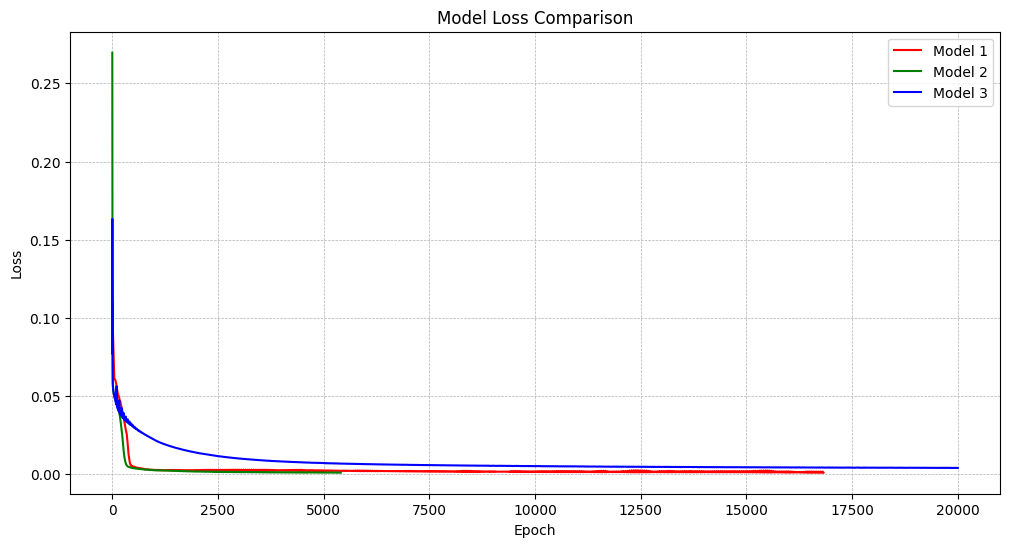

In [30]:
plt.figure(figsize=(12, 6))

# Plot each model's loss with appropriate labels and colors
plt.plot(m1_epoch_arr, m1_loss_arr, color="r", label='Model 1')
plt.plot(m2_epoch_arr, m2_loss_arr, color="g", label='Model 2')
plt.plot(m3_epoch_arr, m3_loss_arr, color="b", label='Model 3')

# Adding legend directly in the plot command improves readability
plt.legend()

plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Adding grid for better readability of the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


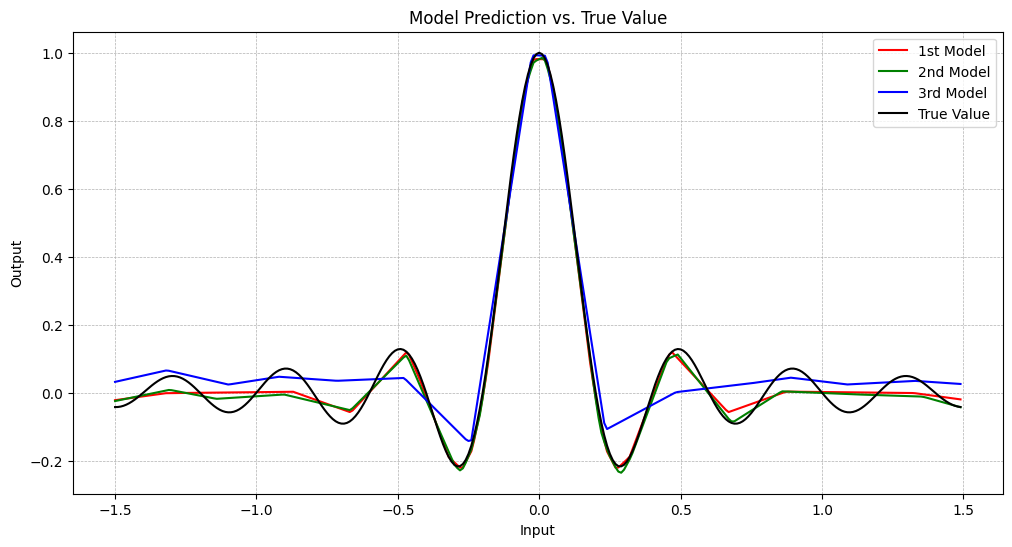

In [31]:
plt.figure(figsize=(12, 6))

# Assuming 'x' is your input data and 'y' is the true target values
# Plotting model predictions
plt.plot(x, m1_prediction.detach().numpy(), color="r", label='1st Model')
plt.plot(x, m2_prediction.detach().numpy(), color="g", label='2nd Model')
plt.plot(x, m3_prediction.detach().numpy(), color="b", label='3rd Model')

# Plotting true values
plt.plot(x, y, color="black", label='True Value')

plt.title('Model Prediction vs. True Value')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


# Function 2

In [32]:
torch.manual_seed(1)

In [33]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


<ipython-input-36-4446e7d931a9>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x, dtype=torch.float32)
<ipython-input-36-4446e7d931a9>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32)


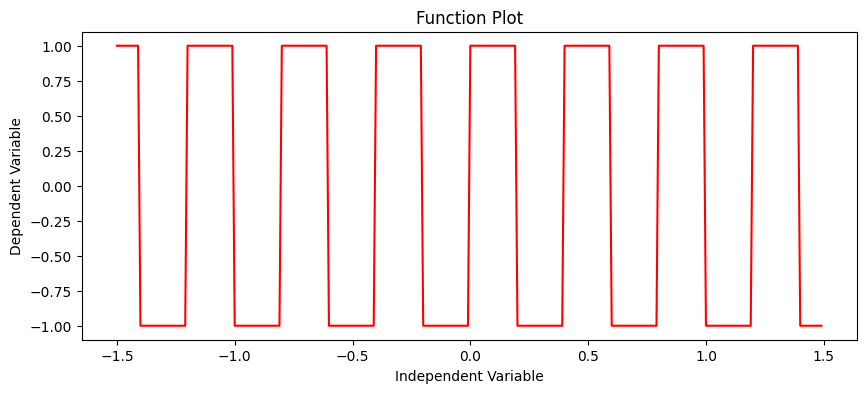

In [36]:
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Convert tensors to numpy arrays for plotting
x_np = x_tensor.numpy()
y_np = y_tensor.numpy()

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(x_np, y_np, color="red")
plt.title('Function Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

## Model 1

In [37]:
model_sign_1 = Model1()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_sign_1, x_tensor, y_tensor)

571


<ipython-input-37-7eeaba9fe91c>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x, dtype=torch.float32)
<ipython-input-37-7eeaba9fe91c>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32)


epoch: 500, loss = 0.9793
epoch: 1000, loss = 0.4446
epoch: 1500, loss = 0.4236
epoch: 2000, loss = 0.4071
epoch: 2500, loss = 0.4005
epoch: 3000, loss = 0.3776
epoch: 3500, loss = 0.3203
epoch: 4000, loss = 0.2299
epoch: 4500, loss = 0.6585
epoch: 5000, loss = 0.1128
epoch: 5500, loss = 0.0733
epoch: 6000, loss = 0.0565
epoch: 6500, loss = 0.1088
epoch: 7000, loss = 0.0392
epoch: 7500, loss = 0.1012
epoch: 8000, loss = 0.2180
epoch: 8500, loss = 0.0244
epoch: 9000, loss = 0.0295
epoch: 9500, loss = 0.0573
epoch: 10000, loss = 0.0189
epoch: 10500, loss = 0.0423
epoch: 11000, loss = 0.0179
epoch: 11500, loss = 0.1361
epoch: 12000, loss = 0.0166
epoch: 12500, loss = 0.0178
epoch: 13000, loss = 0.0132
epoch: 13500, loss = 0.0122
epoch: 14000, loss = 0.1540
epoch: 14500, loss = 0.0110
epoch: 15000, loss = 0.1049
epoch: 15500, loss = 0.0139
epoch: 16000, loss = 0.0154
epoch: 16500, loss = 0.0104
epoch: 17000, loss = 0.0096
epoch: 17500, loss = 0.0086
epoch: 18000, loss = 0.0781
epoch: 18500

## Model 2

In [39]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, x_tensor, y_tensor)

572


<ipython-input-39-3832e0a56d96>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x, dtype=torch.float32)
<ipython-input-39-3832e0a56d96>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32)


epoch: 500, loss = 0.8120
epoch: 1000, loss = 0.3082
epoch: 1500, loss = 0.2667
epoch: 2000, loss = 0.2493
epoch: 2500, loss = 0.2405
epoch: 3000, loss = 0.2334
epoch: 3500, loss = 0.2277
epoch: 4000, loss = 0.2236
epoch: 4500, loss = 0.2244
epoch: 5000, loss = 0.2175
epoch: 5500, loss = 0.2161
epoch: 6000, loss = 0.2137
epoch: 6500, loss = 0.2247
epoch: 7000, loss = 0.2140
epoch: 7500, loss = 0.2105
epoch: 8000, loss = 0.2093
epoch: 8500, loss = 0.2089
epoch: 9000, loss = 0.2102
epoch: 9500, loss = 0.2129
epoch: 10000, loss = 0.2063
epoch: 10500, loss = 0.2060
epoch: 11000, loss = 0.2056
epoch: 11500, loss = 0.2052
epoch: 12000, loss = 0.2043
epoch: 12500, loss = 0.2037
epoch: 13000, loss = 0.2055
epoch: 13500, loss = 0.2035
epoch: 14000, loss = 0.2030
epoch: 14500, loss = 0.2024
epoch: 15000, loss = 0.2078
epoch: 15500, loss = 0.2019
epoch: 16000, loss = 0.2036
epoch: 16500, loss = 0.2036
epoch: 17000, loss = 0.2021
epoch: 17500, loss = 0.2011
epoch: 18000, loss = 0.2003
epoch: 18500

## Model 3

In [40]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, x_tensor, y_tensor)

571


<ipython-input-40-a1b1b090eb23>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(x, dtype=torch.float32)
<ipython-input-40-a1b1b090eb23>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32)


epoch: 500, loss = 0.9377
epoch: 1000, loss = 0.7721
epoch: 1500, loss = 0.5747
epoch: 2000, loss = 0.4483
epoch: 2500, loss = 0.3694
epoch: 3000, loss = 0.3199
epoch: 3500, loss = 0.2888
epoch: 4000, loss = 0.2684
epoch: 4500, loss = 0.2540
epoch: 5000, loss = 0.2419
epoch: 5500, loss = 0.2333
epoch: 6000, loss = 0.2252
epoch: 6500, loss = 0.2196
epoch: 7000, loss = 0.2151
epoch: 7500, loss = 0.2107
epoch: 8000, loss = 0.2071
epoch: 8500, loss = 0.2044
epoch: 9000, loss = 0.2018
epoch: 9500, loss = 0.1996
epoch: 10000, loss = 0.1974
epoch: 10500, loss = 0.1955
epoch: 11000, loss = 0.1940
epoch: 11500, loss = 0.1925
epoch: 12000, loss = 0.1913
epoch: 12500, loss = 0.1900
epoch: 13000, loss = 0.1889
epoch: 13500, loss = 0.1881
epoch: 14000, loss = 0.1867
epoch: 14500, loss = 0.1858
epoch: 15000, loss = 0.1850
epoch: 15500, loss = 0.1839
epoch: 16000, loss = 0.1832
epoch: 16500, loss = 0.1824
epoch: 17000, loss = 0.1817
epoch: 17500, loss = 0.1810
epoch: 18000, loss = 0.1803
epoch: 18500

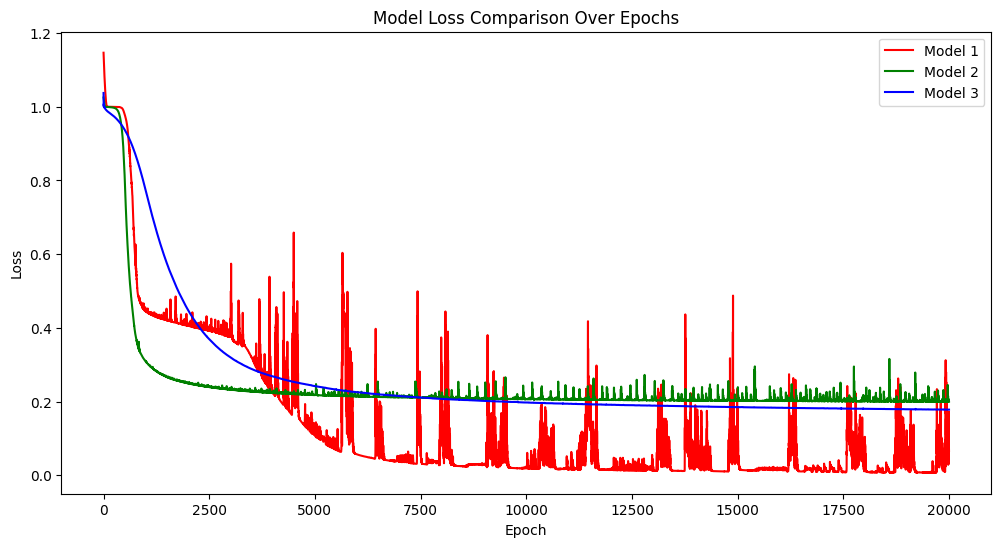

In [41]:
plt.figure(figsize=(12, 6))

# Plot each model's loss with a distinct color and label
plt.plot(m1_epoch_arr, m1_loss_arr, 'r', label='Model 1')
plt.plot(m2_epoch_arr, m2_loss_arr, 'g', label='Model 2')
plt.plot(m3_epoch_arr, m3_loss_arr, 'b', label='Model 3')

# Adding title and labels for clarity
plt.title('Model Loss Comparison Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display legend to identify each line
plt.legend()

# Show the plot
plt.show()

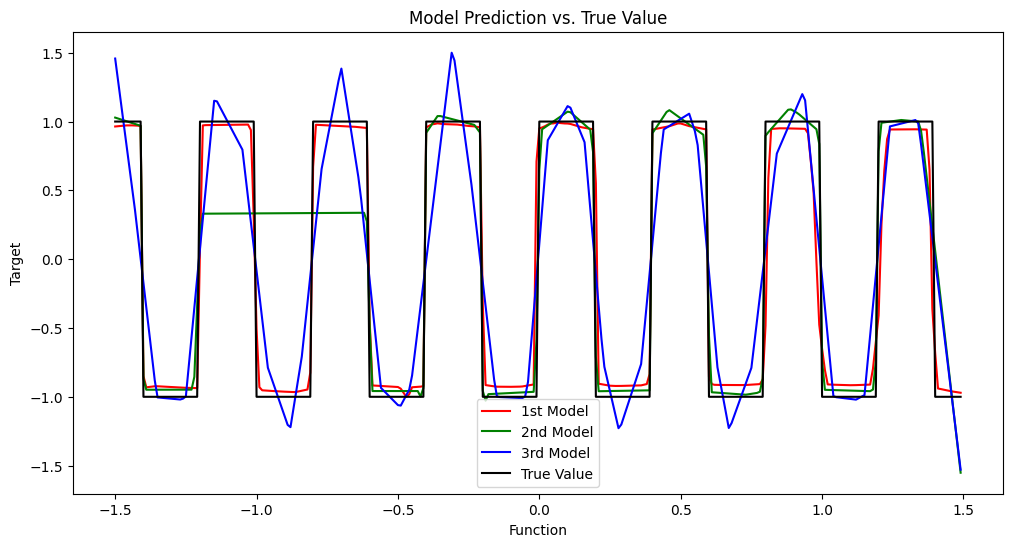

In [42]:
plt.figure(figsize=(12,6))

# Convert PyTorch tensors to NumPy arrays for plotting
plt.plot(x, m1_prediction.detach().numpy(), color="r", label='1st Model')
plt.plot(x, m2_prediction.detach().numpy(), color="g", label='2nd Model')
plt.plot(x, m3_prediction.detach().numpy(), color="b", label='3rd Model')

# Plot true values
plt.plot(x, y, color="black", label='True Value')

plt.title('Model Prediction vs. True Value')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()

plt.show()